## 1. Data Source and Contents
The data is provided in a .csv file. Download the data and other files for this
assignment from the following GitHub link. There is a column indicating the rows to be used as “Training Data” and “Testing Data”. You can split the files based on this column value.
https://github.com/ArinB/MSBA-CA-03-Decision-Trees

In [0]:
#import packages required
import pandas as pd
import numpy as np
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [11]:
#open the data file as a dataframe
census=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
#show the first several rows
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## 2.Data Quality Analysis (DQA)

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
hours_per_week_bin    48842 non-null object
occupation_bin        48842 non-null object
msr_bin               48842 non-null object
capital_gl_bin        48842 non-null object
race_sex_bin          48842 non-null object
education_num_bin     48842 non-null object
education_bin         48842 non-null object
workclass_bin         48842 non-null object
age_bin               48842 non-null object
flag                  48842 non-null object
y                     48842 non-null int64
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


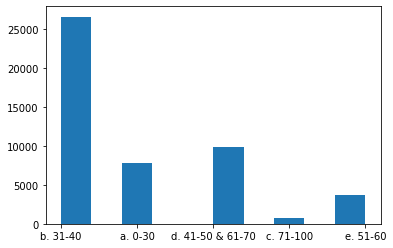

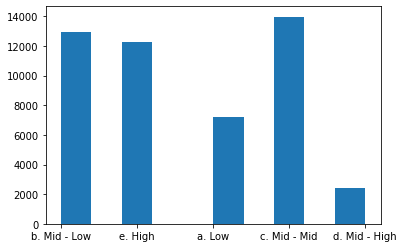

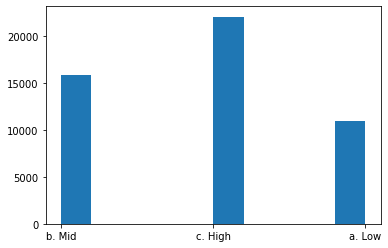

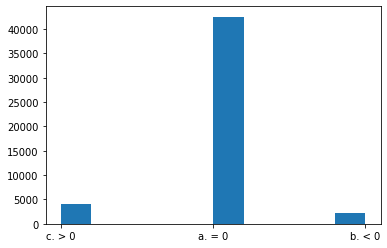

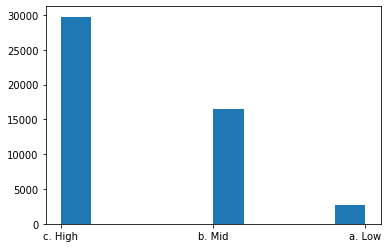

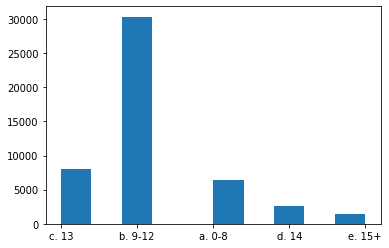

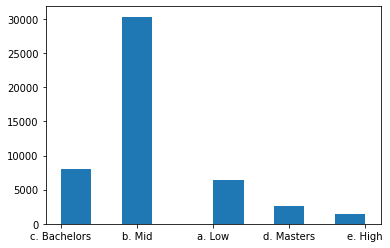

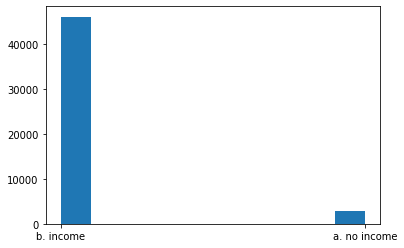

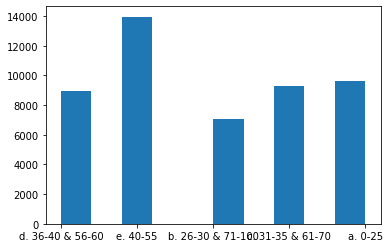

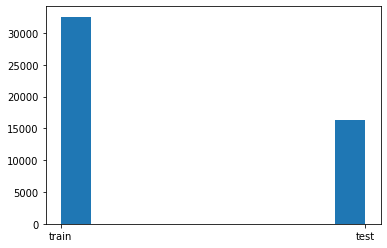

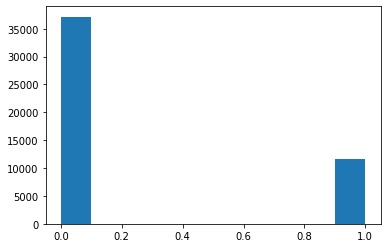

In [12]:
#Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.
print(census.isnull().sum())
print(census.info())
#no missing values like NaN is dectected

#draw a histogram for each column in a for loop to detect outliers
for col in census.columns:
  plt.hist(census[col])
  plt.show()
#Bar charts show that there are no outliers in all columns, all data is grouped as specified

In [13]:
#perform describe() for description for each column in a for loop
for col in census.columns:
  print(census[col].describe())

count        48842
unique           5
top       b. 31-40
freq         26639
Name: hours_per_week_bin, dtype: object
count            48842
unique               5
top       c. Mid - Mid
freq             13971
Name: occupation_bin, dtype: object
count       48842
unique          3
top       c. High
freq        22047
Name: msr_bin, dtype: object
count      48842
unique         3
top       a. = 0
freq       42525
Name: capital_gl_bin, dtype: object
count       48842
unique          3
top       c. High
freq        29737
Name: race_sex_bin, dtype: object
count       48842
unique          5
top       b. 9-12
freq        30324
Name: education_num_bin, dtype: object
count      48842
unique         5
top       b. Mid
freq       30324
Name: education_bin, dtype: object
count         48842
unique            2
top       b. income
freq          46012
Name: workclass_bin, dtype: object
count        48842
unique           5
top       e. 40-55
freq         13963
Name: age_bin, dtype: object
count     4

In [0]:
#Perform necessary data cleansing and transformation based on your observations from the data quality analysis
#Each column of data is grouped properly, the training dataset is about twice of the test dataset,
#the results of 0 and 1 don't have a signicifant difference. No need to clean data.


## 3. Exploratory Data Analysis (EDA)

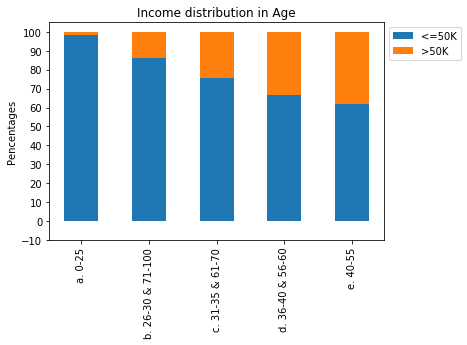

In [14]:
#Stack bars: Age
#there are no other outliers from the groups
N=census.age_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
age_rich=[]
age_poor=[]
#get unique values in age_values
age_values=np.sort(census.age_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
age_rich_mean=census.groupby('age_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
age_poor_mean=age_rich_mean.apply(rest_percent)

#accouding to group name from age, assign percentages to two outcome groups
for group in age_values:
  age_rich.append(age_rich_mean[group])
  age_poor.append(age_poor_mean[group])

#plotting, can switch bottom bars if necessary

age_p1=plt.bar(ind,age_poor,width)
age_p2=plt.bar(ind,age_rich,width,bottom=age_poor)

#labels, ticks and legend
plt.ylabel('Age')
plt.ylabel('Pencentages')
plt.title('Income distribution in Age')
plt.xticks(ind,age_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

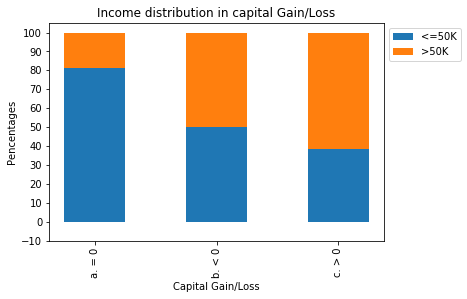

In [15]:
#Stack bars: Capital Gain/Loss
#there are no other outliers from the groups
N=census.capital_gl_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
capital_rich=[]
capital_poor=[]
#get unique values in capital_values
capital_values=np.sort(census.capital_gl_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
capital_rich_mean=census.groupby('capital_gl_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
capital_poor_mean=capital_rich_mean.apply(rest_percent)

#accouding to group name, assign percentages to two outcome groups
for group in capital_values:
  capital_rich.append(capital_rich_mean[group])
  capital_poor.append(capital_poor_mean[group])

#plotting, can switch bottom bars if necessary
capital_p1=plt.bar(ind,capital_poor,width)
capital_p2=plt.bar(ind,capital_rich,width,bottom=capital_poor)


#labels, ticks and legend
plt.xlabel('Capital Gain/Loss')
plt.ylabel('Pencentages')
plt.title('Income distribution in capital Gain/Loss')
plt.xticks(ind,capital_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

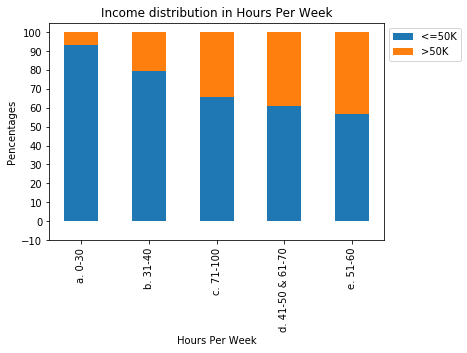

In [16]:
#Stack bars: Hours per Week
#there are no other outliers from the groups
N=census.hours_per_week_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
hpw_rich=[]
hpw_poor=[]
#get unique values
hpw_values=np.sort(census.hours_per_week_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
hpw_rich_mean=census.groupby('hours_per_week_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
hpw_poor_mean=hpw_rich_mean.apply(rest_percent)

#accouding to group name, assign percentages to two outcome groups
for group in hpw_values:
  hpw_rich.append(hpw_rich_mean[group])
  hpw_poor.append(hpw_poor_mean[group])

#plotting, can switch bottom bars if necessary
hpw_p1=plt.bar(ind,hpw_poor,width)
hpw_p2=plt.bar(ind,hpw_rich,width,bottom=hpw_poor)


#labels, ticks and legend
plt.xlabel('Hours Per Week')
plt.ylabel('Pencentages')
plt.title('Income distribution in Hours Per Week')
plt.xticks(ind,hpw_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

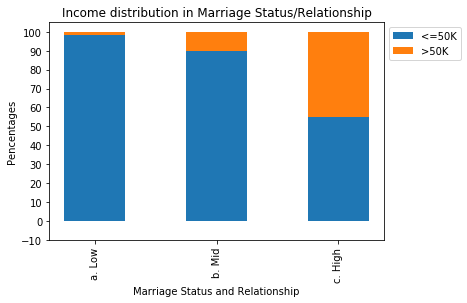

In [17]:
#Stack bars: Marriage Status and Relationship
#there are no other outliers from the groups
N=census.msr_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
msr_rich=[]
msr_poor=[]
#get unique values
msr_values=np.sort(census.msr_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
msr_rich_mean=census.groupby('msr_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
msr_poor_mean=msr_rich_mean.apply(rest_percent)

#accouding to group name, assign percentages to two outcome groups
for group in msr_values:
  msr_rich.append(msr_rich_mean[group])
  msr_poor.append(msr_poor_mean[group])

#plotting, can switch bottom bars if necessary
msr_p1=plt.bar(ind,msr_poor,width)
msr_p2=plt.bar(ind,msr_rich,width,bottom=msr_poor)


#labels, ticks and legend
plt.xlabel('Marriage Status and Relationship')
plt.ylabel('Pencentages')
plt.title('Income distribution in Marriage Status/Relationship')
plt.xticks(ind,msr_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

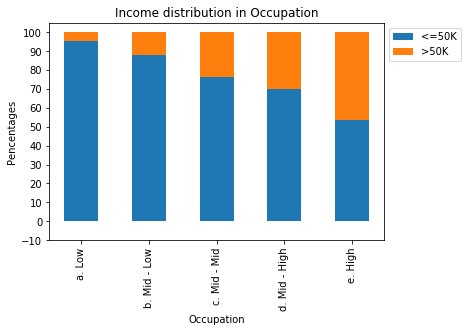

In [18]:
#Stack bars: Occupation
#there are no other outliers from the groups
N=census.occupation_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
occupation_rich=[]
occupation_poor=[]
#get unique values
occupation_values=np.sort(census.occupation_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
occupation_rich_mean=census.groupby('occupation_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
occupation_poor_mean=occupation_rich_mean.apply(rest_percent)

#accouding to group name, assign percentages to two outcome groups
for group in occupation_values:
  occupation_rich.append(occupation_rich_mean[group])
  occupation_poor.append(occupation_poor_mean[group])

#plotting, can switch bottom bars if necessary
occupation_p1=plt.bar(ind,occupation_poor,width)
occupation_p2=plt.bar(ind,occupation_rich,width,bottom=occupation_poor)


#labels, ticks and legend
plt.xlabel('Occupation')
plt.ylabel('Pencentages')
plt.title('Income distribution in Occupation')
plt.xticks(ind,occupation_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

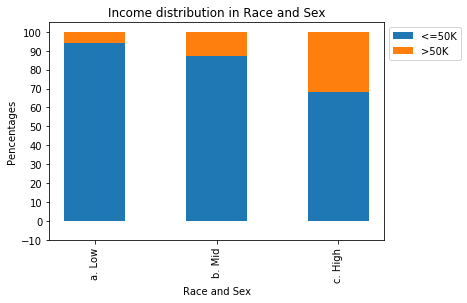

In [19]:
#Stack bars: Race and Sex
#there are no other outliers from the groups
N=census.race_sex_bin.nunique()
ind=np.arange(N)
#create an array of numbers for postioning the groups in the graph later
width=0.5

#empty lists for saving sperate percentage values for diffrent groups
#define outcome group"1","0" as rich and poor
rsb_rich=[]
rsb_poor=[]
#get unique values
rsb_values=np.sort(census.race_sex_bin.unique())


#use groupby.mean instead of percantges in groupby.count to calculate percentages in "1"s
#since there are only 1 and 0 in "y" column
rsb_rich_mean=census.groupby('race_sex_bin')['y'].mean()*100

#define a function to get serie of percentages of "0"s
def rest_percent(serie):
  return 100-serie
rsb_poor_mean=rsb_rich_mean.apply(rest_percent)

#accouding to group name, assign percentages to two outcome groups
for group in rsb_values:
  rsb_rich.append(rsb_rich_mean[group])
  rsb_poor.append(rsb_poor_mean[group])

#plotting, can switch bottom bars if necessary
rsb_p1=plt.bar(ind,rsb_poor,width)
rsb_p2=plt.bar(ind,rsb_rich,width,bottom=rsb_poor)


#labels, ticks and legend
plt.xlabel('Race and Sex')
plt.ylabel('Pencentages')
plt.title('Income distribution in Race and Sex')
plt.xticks(ind,rsb_values,rotation=90)
plt.yticks(np.arange(-10, 110, 10))
plt.legend(('<=50K', '>50K'),bbox_to_anchor=(1,1))

#Reference of making stacked bars:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

#Moving the legends out of graph:
#https://stackoverflow.com/questions/30413789/matplotlib-automatic-legend-outside-plot

## 4. Build Decision Tree Classifier Models
Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.

Disadvantages: Decision tree can create complex trees that do not generalize well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.

Use “DecisionTreeClassifier” algorithm from scikit learn. Find details of sklearn tree algorithm below. Scitkit Learn implements an optimized version of CART algorithm and can be used for binary class as well as multi-class classifications. It can be used for classification, as well as regression. Study the following link thoroughly, including Section 1.10.5 (Tips on Practical Use).

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

In [20]:
#replace categroical values with floats
census_copy=census

replace_dict={'a. 0-30':0,'b. 31-40':1,'c. 71-100':2,'d. 41-50 & 61-70':3,'e. 51-60':4,
              'a. Low':0,'b. Mid - Low':1,'c. Mid - Mid':2,'d. Mid - High':3,'e. High':4,
              'b. Mid':1, 'c. High':2,
              'a. = 0':0, 'b. < 0':1, 'c. > 0':2,
              'c. Bachelors':2, 'd. Masters':3, 'e. High':4,
              'a. 0-25':0, 'b. 26-30 & 71-100':1, 'c. 31-35 & 61-70':2,'d. 36-40 & 56-60':3,'e. 40-55':4,
}

#or use pd.factorize() instead

census_copy=census_copy.replace(replace_dict)

census_copy.describe()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,y
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.488064,1.990254,1.227673,0.211949,1.554625,1.229618,2.216310,0.239282
std,1.198006,1.382509,0.789489,0.576420,0.596200,0.850605,1.487275,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
75%,3.000000,4.000000,2.000000,0.000000,2.000000,1.000000,4.000000,0.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,4.000000,1.000000


In [0]:
from sklearn import tree
#splitting the train and test dataset
train_data=census_copy[census_copy['flag']=='train']
test_data=census_copy[census_copy['flag']=='test']

#selecting independant and dependant variables
X_train = train_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_train = train_data['y']

#free to change the hyperparameter here
DTclf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=7,min_samples_leaf=20,max_depth=8, random_state=101)

#fit the data
DTclf = DTclf.fit(X_train, Y_train)

#split test data
X_test=X = test_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_test = test_data['y']

#predict
y_pred=DTclf.predict(X_test)

## 5. Visualize Your Decision Tree using GraphViz
Get the detail of how to do this from the following link:
https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


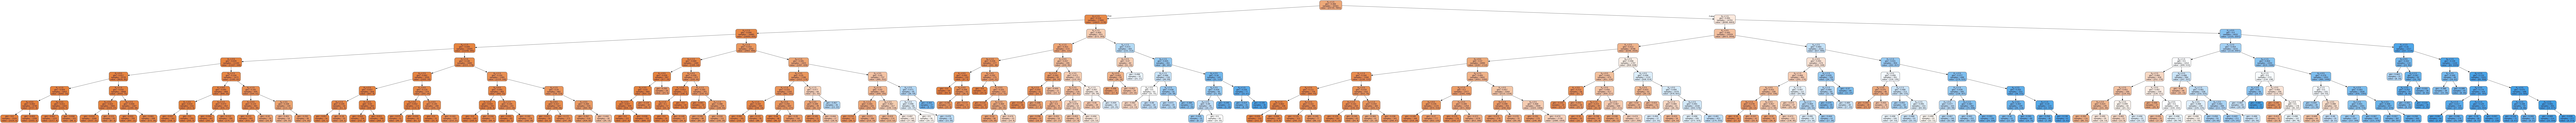

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(180.20326271186443, 205.35999999999999, 'X[2] <= 1.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(100.9010593220339, 181.2, 'X[3] <= 1.5\ngini = 0.124\nsamples = 17800\nvalue = [16622, 1178]'),
 Text(64.12271186440678, 157.04, 'X[5] <= 1.5\ngini = 0.094\nsamples = 16885\nvalue = [16050, 835]'),
 Text(36.31728813559322, 132.88, 'X[0] <= 1.5\ngini = 0.049\nsamples = 13593\nvalue = [13248, 345]'),
 Text(18.15864406779661, 108.72, 'X[1] <= 2.5\ngini = 0.029\nsamples = 11193\nvalue = [11027, 166]'),
 Text(9.079322033898306, 84.56, 'X[2] <= 0.5\ngini = 0.017\nsamples = 9720\nvalue = [9635, 85]'),
 Text(4.539661016949153, 60.400000000000006, 'X[1] <= 1.5\ngini = 0.004\nsamples = 5052\nvalue = [5042, 10]'),
 Text(2.2698305084745765, 36.24000000000001, 'X[0] <= 0.5\ngini = 0.002\nsamples = 3730\nvalue = [3727, 3]'),
 Text(1.1349152542372882, 12.079999999999984, 'gini = 0.0\nsamples = 1524\nvalue = [1524, 0]'),
 Text(3.4047457627118645, 12.079999999999984, 'gini = 0.003\n

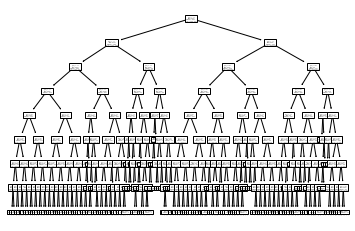

In [23]:
#another way of plotting the tree
tree.plot_tree(DTclf.fit(X_train, Y_train)) 

## 6. Evaluate Decision Tree Performance

[[11525   910]
 [ 1590  2256]]
Precision is  0.7125710675931776  , Recall is  0.5865834633385335
built-in f1 score is  0.6434683399885909
calculated f1 score is  0.6434683399885909
Accuracy score is  0.846446778453412
AUC score is  0.893169107544358


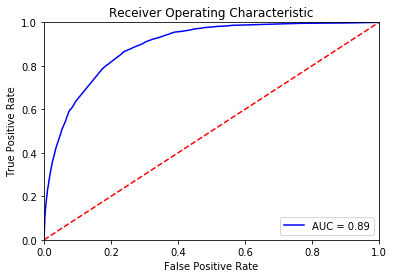

In [24]:
import sklearn.metrics as metrics
#Confusion Matrix
confusion_matrix_census=sklearn.metrics.confusion_matrix(Y_test, y_pred, labels=None, sample_weight=None, normalize=None)
tn, fp, fn, tp = confusion_matrix_census.ravel()
print(confusion_matrix_census)

#Precision and Recall
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print('Precision is ',precision,' , Recall is ',recall)

#f1 score
from sklearn.metrics import precision_recall_fscore_support
f1_score_cen=sklearn.metrics.f1_score(Y_test, y_pred,average='binary')
f1_score_cal=2*precision*recall/(precision+recall)
print('built-in f1 score is ',f1_score_cen)
print('calculated f1 score is ',f1_score_cal)



#Accuracy score and AUC score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

accuracy_DTclf=accuracy_score(Y_test, y_pred)
print('Accuracy score is ',accuracy_DTclf)

y_pred_prob = DTclf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print('AUC score is ',roc_auc)



#ROC
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Reference on f1 socre:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

#Reference on ROC:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

## 7. Tune Decision Tree Performance
Learn about all hyper-parameters and methods of Scikit Learn DecisionTreeClassifier algorithm at:
https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Try varying FOUR of the hyperparameters manually, as per the following table, and train / score your model for each set of these hyperparameters. Record your Tree’s performance with respect to each of these sets of hyperparameters in the Model Performance section of the following table.

Four Hyperparameters to vary:

• Split Criteria – ‘Entropy’ or ‘Gini Impurity’

• Minimum Sample Split – Minimum number of records required in any node for a
further split to be attempted

• Minimum Sample Leaf – Minimum of samples in a leaf node to stop further
splitting (becomes a leaf node)

• Maximum Depth – Maximum depth of the tree allowed

Based on the ranges of values you find in your Decision Tree for these
hyperparameters, vary them by manually choosing your own reasonable values and
manually running the program for each of the Hyper-parameter combinations. An Excel file for this table is provided (Tree Tuning Cases.xlsx). You can enter the values in the given Excel File (Tree Tuning Cases.xlsx) and cut/paste the table in your submission document.

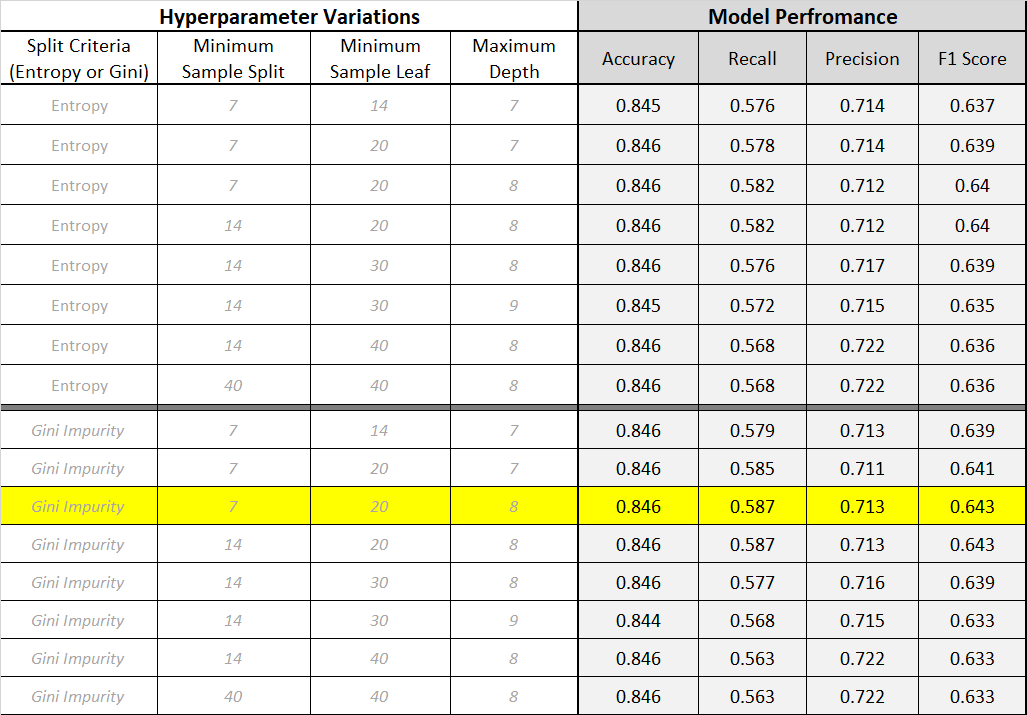

## 8. Conclusion
Explain your observations from the above performance tuning effort.

Q.8.1 How long was your total run time to train the model?

I have run 16 times,  8 for entropy and 8 for gini.


Q.8.2 Did you find the BEST TREE?

Yes, based on the combination of hyperparameters that I have tried.


Q.8.3 Draw the Graph of the BEST TREE Using GraphViz.

It is displayed before in part 5.


Q.8.4 What makes it the best tree?

It should have the highest F1 score and accuracy score compared to other trees.
Based on the hyperparameters tried, the tree with a criterion of gini, min_samples_split of 7, min_samples_leaf of 20, max_depth of 8, could generate the best prediction results.


## 9. Automation of Performance Tuning

Can you “automate” generation of the above “Hyperparameter Vs. Model Performance
Table” in your code itself and display the table in your Notebook?

(You can enter the “Hyperparameter Variation” part of the table manually in an Excel file, save it as CSV with header and read it in a dataframe in Python to repeatedly train/score the model for each of the lines of hyperparameters dataframe.)

In [0]:
#This part 9 could be run independantly without previous steps
#This part of codes concludes all the previous necessary steps before the tuning


#import packages required
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

#open the data file as a dataframe
census=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

#replace categroical values with floats
census_copy=census

replace_dict={'a. 0-30':0,'b. 31-40':1,'c. 71-100':2,'d. 41-50 & 61-70':3,'e. 51-60':4,
              'a. Low':0,'b. Mid - Low':1,'c. Mid - Mid':2,'d. Mid - High':3,'e. High':4,
              'b. Mid':1, 'c. High':2,
              'a. = 0':0, 'b. < 0':1, 'c. > 0':2,
              'c. Bachelors':2, 'd. Masters':3, 'e. High':4,
              'a. 0-25':0, 'b. 26-30 & 71-100':1, 'c. 31-35 & 61-70':2,'d. 36-40 & 56-60':3,'e. 40-55':4,
}

census_copy=census_copy.replace(replace_dict)

census_copy.describe()
from sklearn import tree
#splitting the train and test dataset
train_data=census_copy[census_copy['flag']=='train']
test_data=census_copy[census_copy['flag']=='test']

#selecting independant and dependant variables
X_train = train_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_train = train_data['y']

#split test data
X_test=X = test_data[['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_bin','age_bin']]
Y_test = test_data['y']

In [26]:
criterion_temp=['gini','entropy']
a=list(range(5,10))
sample_split_range=a
sample_leaf_range=list(range(20,40))
depth_range=a

criterion_using=[]
min_samples_split_using=[]
min_samples_leaf_using=[]
max_depth_using=[]
accuracy_got=[]
precision_got=[]
recall_got=[]
f1_score_got=[]


for h in criterion_temp:
  for i in sample_split_range:
    for j in sample_leaf_range:
      for k in depth_range:
      
        # change the hyperparameter here
        DTclf = tree.DecisionTreeClassifier(criterion=h,min_samples_split=i,min_samples_leaf=j,max_depth=k,random_state=101)
        #fit the data
        DTclf = DTclf.fit(X_train, Y_train)

        #predict
        y_pred=DTclf.predict(X_test)

        #Confusion Matrix
        confusion_matrix_census=sklearn.metrics.confusion_matrix(Y_test, y_pred, labels=None, sample_weight=None, normalize=None)
        tn, fp, fn, tp = confusion_matrix_census.ravel()

        #Precision and Recall
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)

        #f1 score
        from sklearn.metrics import precision_recall_fscore_support
        f1_score_cen=sklearn.metrics.f1_score(Y_test, y_pred,average='binary')

        #Accuracy score and AUC score
        import sklearn.metrics as metrics
        from sklearn.metrics import accuracy_score
        accuracy_DTclf=accuracy_score(Y_test, y_pred)


        #recording all the results
        criterion_using.append(h)
        min_samples_split_using.append(i)
        min_samples_leaf_using.append(j)
        max_depth_using.append(k)
        accuracy_got.append(accuracy_DTclf)
        precision_got.append(precision)
        recall_got.append(recall)
        f1_score_got.append(f1_score_cen)

#making up the dataframe with a dictionary
data_dict={'criterion':criterion_using,'min_samples_split': min_samples_split_using,
           'min_samples_leaf':min_samples_leaf_using,'max_depth':max_depth_using,
           'accuracy':accuracy_got,'precision':precision_got,'recall':recall_got,
           'f1_score':f1_score_got}

sample_df=pd.DataFrame(data=data_dict)
sample_df.groupby('min_samples_leaf').mean()


,min_samples_split,max_depth,accuracy,precision,recall,f1_score
min_samples_leaf,,,,,,
20,7,7,0.843560,0.711085,0.569501,0.632020
21,7,7,0.843683,0.711431,0.569709,0.632286
22,7,7,0.843689,0.711386,0.569839,0.632347
23,7,7,0.843677,0.711395,0.569735,0.632288
24,7,7,0.843529,0.710796,0.569839,0.632109
25,7,7,0.843505,0.710813,0.569631,0.631990
26,7,7,0.843474,0.710915,0.569215,0.631781
27,7,7,0.843474,0.710915,0.569215,0.631781
28,7,7,0.843474,0.710915,0.569215,0.631781


In [27]:
#we could display the row that is with the highest accuracy score and f1 score
sample_df.sort_values('accuracy',ascending=False)[['criterion','min_samples_split',	'min_samples_leaf','max_depth',	'accuracy',	'f1_score']].head(10)

,criterion,min_samples_split,min_samples_leaf,max_depth,accuracy,f1_score
13,gini,5,22,8,0.846754,0.644131
108,gini,6,21,8,0.846754,0.644131
213,gini,7,22,8,0.846754,0.644131
313,gini,8,22,8,0.846754,0.644131
413,gini,9,22,8,0.846754,0.644131
308,gini,8,21,8,0.846754,0.644131
8,gini,5,21,8,0.846754,0.644131
408,gini,9,21,8,0.846754,0.644131
208,gini,7,21,8,0.846754,0.644131
113,gini,6,22,8,0.846754,0.644131


In [28]:
sample_df.sort_values('f1_score',ascending=False)[['criterion','min_samples_split',	'min_samples_leaf','max_depth',	'accuracy',	'f1_score']].head(10)

,criterion,min_samples_split,min_samples_leaf,max_depth,accuracy,f1_score
313,gini,8,22,8,0.846754,0.644131
8,gini,5,21,8,0.846754,0.644131
208,gini,7,21,8,0.846754,0.644131
113,gini,6,22,8,0.846754,0.644131
108,gini,6,21,8,0.846754,0.644131
213,gini,7,22,8,0.846754,0.644131
408,gini,9,21,8,0.846754,0.644131
413,gini,9,22,8,0.846754,0.644131
13,gini,5,22,8,0.846754,0.644131
308,gini,8,21,8,0.846754,0.644131


## 10. Prediction using your “trained” Decision Tree Model
Based on the Performance Tuning effort in the previous section, pick your BEST
PERFORMING TREE. Now make prediction of a “new” individual’s Income Category (
<=50K, or >50K ) with the following information.

• Hours Worked per Week = 48

• Occupation Category = Mid - Low

• Marriage Status & Relationships = High

• Capital Gain = Yes

• Race-Sex Group = Mid

• Number of Years of Education = 12

• Education Category = High

• Work Class = Income

• Age = 58

In [29]:
#Part 10 shall be runned after part 9

DTclf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=7,min_samples_leaf=20,max_depth=8,random_state=101)
#fit the data
DTclf = DTclf.fit(X_train, Y_train)

# make up the data
# hpw = 48 -> d. 41-50 & 61-70 -> 3
# occputation  = Mid - Low -> b -> 1
# msr= high -> c -> 2
# capital gain - yes -> c -> 2
# race and sex - mid -> b -> 1
# education category - high - e - 4
# age 58 - d. 36-40 & 56-60 - 3 

X_unknown=[[3,1,2,2,1,4,3]]


#predict
y_predtion=DTclf.predict(X_unknown)
if y_predtion == 0:
  print('It is predicted that this perseon would not have an annual income of $50,000')
if y_predtion == 1:
  print('It is predicted that this perseon would have an annual income of $50,000')
else: print('some error occured')

probability=DTclf.predict_proba(X_unknown)


print('The confidence of the prediction is ',probability[0][y_predtion])

It is predicted that this perseon would have an annual income of $50,000
The confidence of the prediction is  [0.78947368]
